In [38]:
# step 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

step2:Load Dataset from sklearn

In [2]:
data= fetch_california_housing()

# Create DataFrame for easy understanding
df= pd.DataFrame(data.data, columns=data.feature_names)
df["price"]= data.target # target (house price)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


step3: Data Understanding

In [8]:
print("Shape(row, columns):", df.shape)
df.info()
df.describe()

Shape(row, columns): (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


step4:Check

In [7]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


step5: Select Features(X)and Target(y)

In [17]:
X = df.drop("price", axis=1)

y = df["price"]

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (20640, 8)
Y shape: (20640,)


step6: Train-Test Split(one of most crucial concepts in ML)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (16512, 8) (16512,)
Testing set: (4128, 8) (4128,)


step7: Train Linear Regression Model

In [11]:
model= LinearRegression()
model.fit(X_train, y_train)

print("Model Training Completed")

Model Training Completed


step 8: Make Predictions

In [40]:
y_pred= model.predict(X_test)

comparison = pd.DataFrame({
    "Actual Price": y_test.values[:10],
    "Predicted Price": y_pred[:10]
})


step 9: Evaluate Model(RMSE+ R2)

In [41]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared score
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results")
print("RMSE:", rmse)
print("R2 Score:", r2)

# RSME: Average prediction error (lower= better)
# R2: how well a model explain data (closer to 1 = better)

Model Evaluation Results
RMSE: 0.7455813830127764
R2 Score: 0.5757877060324508


step 10:

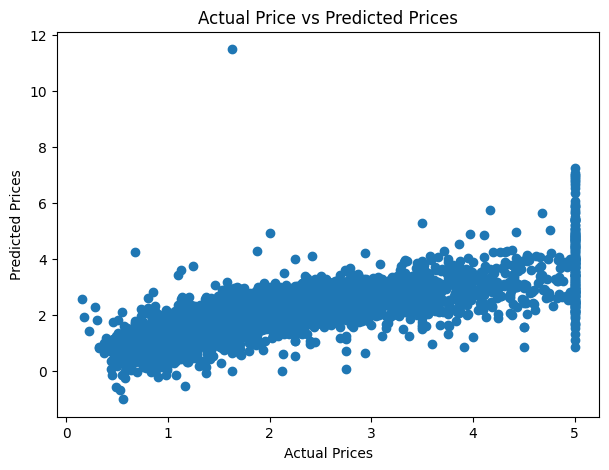

In [42]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.title("Actual Price vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

step 11: Residual Plot(Error Analysis)

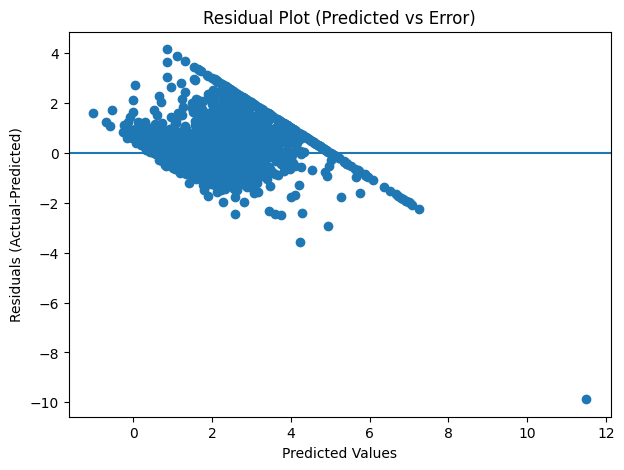

In [45]:
# residuals = actual = predicted
residulas = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residulas)

plt.axhline(y=0) #zero error line
plt.title("Residual Plot (Predicted vs Error)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual-Predicted)")
plt.show()

step 12:Feature Importance(Coefficients)

In [28]:
# Linear regression learns weights (coefficients) for each feature
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

# Meaning:
# Positivive Coefficient -> Feature increases price
# Negative Coefficient -> Feature decreases price

,Feature,Coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


step 13: Simple Improvement

In [43]:
y_log = np.log1p(y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)
model12 = LinearRegression()
model12.fit(X_train2, y_train2)

y_pred2 = model12.predict(X_test2)

rmse2= np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_score2 = r2_score(y_test2, y_pred2)

print("After Log transform")
print("RMSE:", rmse2)
print("R2 Score:", r2_score2)

After Log transform
RMSE: 0.22436602177852213
R2 Score: 0.600615972280346


Step 14 :

In [44]:
# save predictation result as CSV (u should push in your Github)

result_df =  pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

result_df.to_csv("house_price_prediction.csv", index=False)
print("Saved: house_price_predictions.csv")

Saved: house_price_predictions.csv
